<a href="https://colab.research.google.com/github/arctron/learn-pytorch/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
from collections import Counter
torch.__version__

'2.0.1+cu118'

(1000, 2)
(1000,)
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


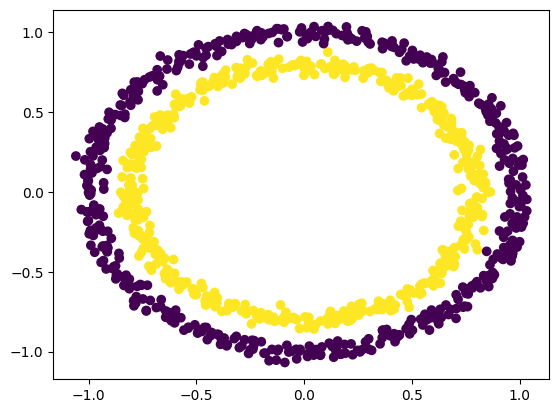

In [3]:
# Create dataset
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)
print(X.shape)
print(y.shape)
print(X[:5])
print(y[:5])

plt.scatter(x = X[:, 0], y = X[:, 1], c = y)

In [4]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(X[:5])
print(y[:5])

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])
tensor([1., 1., 1., 1., 0.])


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([800, 2]) torch.Size([800])
torch.Size([200, 2]) torch.Size([200])


In [53]:
torch.manual_seed(42)

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.layer_1(x))

model0 = CircleModelV0()

optimizer = torch.optim.SGD(model0.parameters(), lr=0.1)

for i in range(1000):
  model0.train()

  y_pred = model0(X_train).squeeze()
  loss = (y_train * (1 - y_pred)) + ((1 - y_train) * y_pred)

  # print(y_pred[:5])
  # print(y_train[:5])
  # print(loss[:5])

  optimizer.zero_grad()

  loss.sum().backward()

  optimizer.step()

  model0.eval()

  with torch.inference_mode():
    y_test_pred = model0(X_test)
    if i % 100 == 0:
      # print(y_test_pred[:5])
      # print(y_test[:5])
      print(loss.sum())


tensor(398.7576)
tensor(345.6615)
tensor(339.3026)
tensor(335.9260)
tensor(333.8899)
tensor(332.4829)
tensor(331.3608)
tensor(330.4205)
tensor(329.6911)
tensor(329.1015)


0 tensor(399.8836)
100 tensor(304.8588)
200 tensor(316.2398)
300 tensor(195.4692)
400 tensor(83.6161)
500 tensor(214.9646)
600 tensor(2.9730)
700 tensor(1.2350)
800 tensor(0.9359)
900 tensor(0.7755)
1000 tensor(0.6722)
1100 tensor(0.5970)
1200 tensor(0.5381)
1300 tensor(0.4900)
1400 tensor(0.4495)
1500 tensor(0.4145)
1600 tensor(0.3838)
1700 tensor(0.3567)
1800 tensor(0.3329)
1900 tensor(0.3122)
2000 tensor(0.2944)
2100 tensor(0.2790)
2200 tensor(0.2656)
2300 tensor(0.2538)
2400 tensor(0.2434)
2500 tensor(0.2341)
2600 tensor(0.2256)
2700 tensor(0.2180)
2800 tensor(0.2109)
2900 tensor(0.2044)
3000 tensor(0.1983)
3100 tensor(0.1926)
3200 tensor(0.1872)
3300 tensor(0.1822)
3400 tensor(0.1775)
3500 tensor(0.1730)
3600 tensor(0.1687)
3700 tensor(0.1647)
3800 tensor(0.1609)
3900 tensor(0.1573)
4000 tensor(0.1538)
4100 tensor(0.1506)
4200 tensor(0.1474)
4300 tensor(0.1445)
4400 tensor(0.1417)
4500 tensor(0.1390)
4600 tensor(0.1364)
4700 tensor(0.1339)
4800 tensor(0.1316)
4900 tensor(0.1294)
5

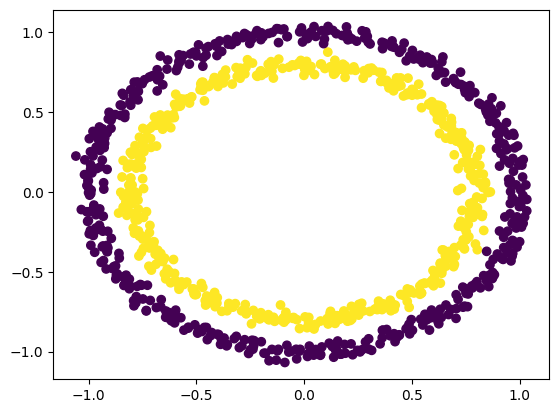

In [85]:
# torch.manual_seed(42)

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=12)
    self.layer_2 = nn.Linear(in_features=12, out_features=1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.layer_2(self.sigmoid(self.layer_1(x))))

model1 = CircleModelV1()

optimizer = torch.optim.SGD(model1.parameters(), lr=0.1)

for i in range(10000):
  model1.train()

  y_pred = model1(X_train).squeeze()
  loss = (y_train * (1 - y_pred)) + ((1 - y_train) * y_pred)

  # print(y_pred[:5])
  # print(y_train[:5])
  # print(loss[:5])

  optimizer.zero_grad()

  loss.sum().backward()

  optimizer.step()

  model1.eval()

  with torch.inference_mode():
    y_test_pred = model1(X_test)
    if i % 100 == 0:
      # print(y_test_pred[:5])
      # print(y_test[:5])
      print(i, loss.sum())


print('Train:', Counter(torch.round(model1(X_train).squeeze()).detach().numpy()))
print('Test:', Counter(torch.round(model1(X_test).squeeze()).detach().numpy()))
plt.scatter(x = X[:, 0], y = X[:, 1], c =  torch.round(model1(X).squeeze()).detach().numpy())

### Note regarding reducing loss mean vs loss sum
Generally learning rates are expressed per example so the loss to find the gradients for updates should be per example also. If the loss is per batch then the learning rate needs to be reduced by the batch size to get comparable training results.
https://stackoverflow.com/questions/41954308/loss-function-works-with-reduce-mean-but-not-reduce-sum

---



0 tensor(0.7129, grad_fn=<NegBackward0>)
100 tensor(0.6875, grad_fn=<NegBackward0>)
200 tensor(0.6845, grad_fn=<NegBackward0>)
300 tensor(0.6805, grad_fn=<NegBackward0>)
400 tensor(0.6751, grad_fn=<NegBackward0>)
500 tensor(0.6682, grad_fn=<NegBackward0>)
600 tensor(0.6594, grad_fn=<NegBackward0>)
700 tensor(0.6483, grad_fn=<NegBackward0>)
800 tensor(0.6337, grad_fn=<NegBackward0>)
900 tensor(0.6146, grad_fn=<NegBackward0>)
1000 tensor(0.5911, grad_fn=<NegBackward0>)
1100 tensor(0.5645, grad_fn=<NegBackward0>)
1200 tensor(0.5364, grad_fn=<NegBackward0>)
1300 tensor(0.5081, grad_fn=<NegBackward0>)
1400 tensor(0.4808, grad_fn=<NegBackward0>)
1500 tensor(0.4556, grad_fn=<NegBackward0>)
1600 tensor(0.4331, grad_fn=<NegBackward0>)
1700 tensor(0.4133, grad_fn=<NegBackward0>)
1800 tensor(0.3961, grad_fn=<NegBackward0>)
1900 tensor(0.3809, grad_fn=<NegBackward0>)
2000 tensor(0.3675, grad_fn=<NegBackward0>)
2100 tensor(0.3556, grad_fn=<NegBackward0>)
2200 tensor(0.3450, grad_fn=<NegBackward0>)


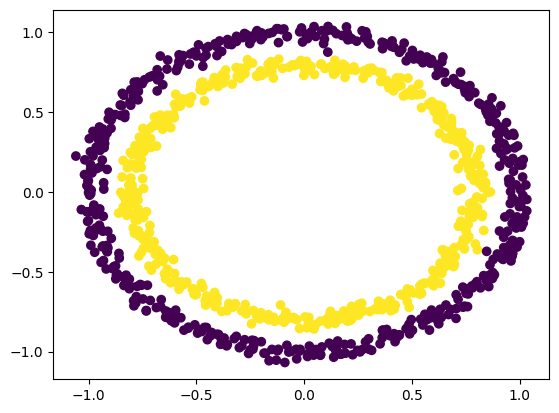

In [71]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=12)
    self.layer_2 = nn.Linear(in_features=12, out_features=2)
    self.tanh = nn.Tanh()

  def forward(self, x):
    return self.tanh(self.layer_2(self.tanh(self.layer_1(x))))

model2 = CircleModelV2()

# optimizer = torch.optim.SGD(model2.parameters(), lr=0.1/len(y_train))
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)

for i in range(10000):
  y_pred = model2(X_train).exp()

  y_prob = y_pred / y_pred.sum(dim=1, keepdim=True)

  y_prob_select = y_prob[torch.arange(len(y_train)), y_train.type(torch.int)]

  y_log_prob = y_prob_select.log()

  loss = -y_log_prob.mean()

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  if i % 100 == 0:
    print(i, loss)


model2.eval()

y_train_pred = model2(X_train).exp()
y_test_pred = model2(X_test).exp()
y_train_prob = y_train_pred / y_train_pred.sum(dim=1, keepdim=True)
y_test_prob = y_test_pred / y_test_pred.sum(dim=1, keepdim=True)
y_train_argmax = y_train_prob.argmax(dim=1)
y_test_argmax = y_test_prob.argmax(dim=1)

y_pred = model2(X).exp()
y_prob = y_pred / y_pred.sum(dim=1, keepdim=True)
y_argmax = y_prob.argmax(dim=1)

print('Train:', Counter(y_train_argmax.detach().numpy()))
print('Test:', Counter(y_test_argmax.detach().numpy()))
plt.scatter(x = X[:, 0], y = X[:, 1], c =  y_argmax.detach().numpy())